In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

In [11]:
df = pd.read_csv('/Users/fortunatof/code/knowledge/content/ryanair/cloud-reports/data/weekly-jira-2021-02-08.csv')
prevWeekStartDate = '2021-02-01'

In [12]:
df['createdDate'] = pd.to_datetime(df['Created'], format="%d/%b/%y %H:%M %p")
df = df.rename(columns={'Custom field (Scrum Team)': 'ScrumTeam'})
def groupIssues(x):
    if x == 'Bug':
        return x
    else:
        return 'Task'
df['IssueTypeRemap'] = df['Issue Type'].apply(groupIssues)

## Weekly task to bugs ratio

In [13]:
prev_week_tot = df.loc[(df.createdDate > prevWeekStartDate)].groupby(['ScrumTeam', 'IssueTypeRemap'])\
.size()

In [14]:
prev_week_tot.reset_index().set_index(['ScrumTeam', 'IssueTypeRemap']).rename(columns={0: 'Last week'})

Last week
ScrumTeam        IssueTypeRemap           
Dragonflies      Bug                     2
                 Task                    1
Frontend Core    Task                    7
Huby             Bug                     4
                 Task                   11
Meeseeks         Bug                    18
                 Task                   10
Payment Services Bug                     2
SpaceDogs        Bug                     1
                 Task                    8
Wanderlust       Bug                     1
                 Task                   10

In [15]:
df.createdDate

0     2021-02-08 08:52:00
1     2021-02-08 08:44:00
2     2021-02-08 08:13:00
3     2021-02-08 08:06:00
4     2021-02-08 07:24:00
              ...        
286   2021-01-25 10:59:00
287   2021-01-25 10:24:00
288   2021-01-25 10:04:00
289   2021-01-25 09:53:00
290   2021-01-25 09:17:00
Name: createdDate, Length: 291, dtype: datetime64[ns]

In [16]:
prev_week = df.groupby(['ScrumTeam', 'IssueTypeRemap'])\
.size()\
.groupby(level=0).apply(lambda x: 100*x/x.sum())

In [17]:
pwf = prev_week.reset_index().set_index(['ScrumTeam', 'IssueTypeRemap']).rename(columns={0: '1 Week ago %'})

<AxesSubplot:xlabel='ScrumTeam'>

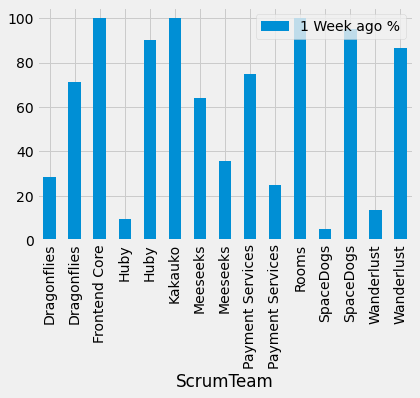

In [18]:

pwf.reset_index().plot(x="ScrumTeam", y=["1 Week ago %"], kind="bar")

In [19]:
pwf

1 Week ago %
ScrumTeam        IssueTypeRemap              
Dragonflies      Bug                28.571429
                 Task               71.428571
Frontend Core    Task              100.000000
Huby             Bug                 9.756098
                 Task               90.243902
Kakauko          Task              100.000000
Meeseeks         Bug                64.197531
                 Task               35.802469
Payment Services Bug                75.000000
                 Task               25.000000
Rooms            Task              100.000000
SpaceDogs        Bug                 5.000000
                 Task               95.000000
Wanderlust       Bug                13.636364
                 Task               86.363636